# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(40)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

*Initial hypothesis: TOTAL value is the result of the sum of HP, Attack, Defense, SP.Atk, Sp. Def
and Speed values*.

$Total = HP + Attack + Defense + Sp. Atk + Sp. Def + Speed$

In [3]:
# let's test our hypothesis by adding the 6 abilites
pokemon['Total_Hypothesis'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
    
# Let's check if Total and Total_Hypothesis values coincide 
# for all pokemons of the dataset.
pokemon['Total'].equals(pokemon['Total_Hypothesis'])

True

*It seems that both values (Total and Total Hypothesis) are equal, so our initial hypothesis that 'Total' is the result of adding values as HP, Attach, Defense, Sp Atk, Sp Def, and Speed is correct.*

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

*First step: encode data from Type 1 column.*

In [4]:
t1_ohe = OneHotEncoder(categories='auto')
t1_feature_arr = t1_ohe.fit_transform(pokemon[['Type 1']]).toarray()
t1_feature_labels = t1_ohe.categories_
t1_features = pd.DataFrame(t1_feature_arr, columns=t1_feature_labels)
display(t1_features)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


*Second step: we'll repeat the process with data from Type 2 col and drop the column 'nan'. In this specific case, data from the column is redundant, as we will know if a Pokemon gets only one Type category by looking at the zeros of other categories.*

In [5]:
t2_ohe = OneHotEncoder(categories='auto')
t2_feature_arr = t2_ohe.fit_transform(pokemon[['Type 2']]).toarray()
t2_feature_labels = t2_ohe.categories_
t2_features = pd.DataFrame(t2_feature_arr, columns=t2_feature_labels)
t2_features_no_nan = t2_features.iloc[:, :-1]
t2_features_no_nan

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Third step: as data is binary and can't overlap (it's one type or the other), we can "merge" both data frames by adding their values.*

In [6]:
types_encoded = t1_features + t2_features_no_nan
display(types_encoded)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# At the moment, our name columns are tuples. Let's clean them
types_encoded.columns = [n[0] for n in types_encoded.columns]

In [8]:
# Now we can concatenate our original data frame and the one with
# encoded values
pokemon_concatenated = pd.concat([pokemon, types_encoded], axis= 1)
pokemon_concatenated.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

*Let's create the matrix correlation using sets of categories*

In [24]:
types_total = pd.concat([types_encoded, pokemon['Total']], axis = 1)

set_1 = types_total[['Total', 'Bug', 'Dark', 'Dragon', 'Electric']]
set_2 = types_total[['Total', 'Fairy', 'Fighting', 'Fire', 'Flying']]
set_3 = types_total[['Total', 'Ghost', 'Grass', 'Ground', 'Ice']]
set_4 = types_total[['Total', 'Normal', 'Poison', 'Psychic', 'Rock']]
set_5 = types_total[['Total', 'Steel', 'Water']]

*Set 1 - Matrix correlation and heatmap*

In [25]:
set1_mc = set_1.corr()
display(set1_mc)

,Total,Bug,Dark,Dragon,Electric
Total,1.000000,-0.145781,0.056154,0.229705,0.020971
Bug,-0.145781,1.000000,-0.082062,-0.081200,-0.045111
Dark,0.056154,-0.082062,1.000000,-0.003963,-0.067375
Dragon,0.229705,-0.081200,-0.003963,1.000000,-0.024000
Electric,0.020971,-0.045111,-0.067375,-0.024000,1.000000


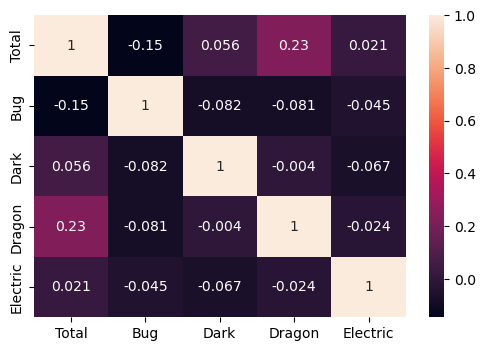

In [26]:
fig, ax = plt.subplots(dpi = 100)
sns.heatmap(set1_mc, annot = True)
plt.show()

*Set 2 - Matrix correlation and heatmap*

In [27]:
set2_mc = set_2.corr()
display(set2_mc)

,Total,Fairy,Fighting,Fire,Flying
Total,1.000000,-0.036698,0.077786,0.078726,0.059383
Fairy,-0.036698,1.000000,-0.061108,-0.067651,-0.052669
Fighting,0.077786,-0.061108,1.000000,0.051130,-0.086119
Fire,0.078726,-0.067651,0.051130,1.000000,-0.028855
Flying,0.059383,-0.052669,-0.086119,-0.028855,1.000000


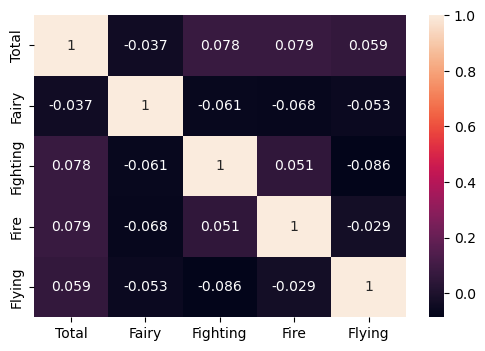

In [28]:
fig, ax = plt.subplots(dpi = 100)
sns.heatmap(set2_mc, annot = True)
plt.show()

*Set 3 - Matrix correlation and heatmap*

In [29]:
set3_mc = set_3.corr()
display(set3_mc)

,Total,Ghost,Grass,Ground,Ice
Total,1.000000,0.003641,-0.052592,0.015060,0.060248
Ghost,0.003641,1.000000,0.075316,-0.035908,-0.029914
Grass,-0.052592,0.075316,1.000000,-0.097033,-0.027476
Ground,0.015060,-0.035908,-0.097033,1.000000,-0.003872
Ice,0.060248,-0.029914,-0.027476,-0.003872,1.000000


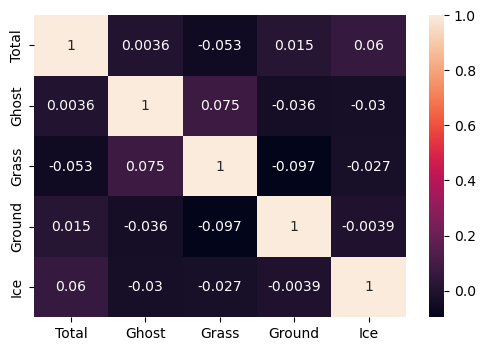

In [30]:
fig, ax = plt.subplots(dpi = 100)
sns.heatmap(set3_mc, annot = True)
plt.show()

*Set 4 - Matrix correlation and heatmap*

In [31]:
set4_mc = set_4.corr()
display(set4_mc)

,Total,Normal,Poison,Psychic,Rock
Total,1.000000,-0.105331,-0.090441,0.124688,0.032731
Normal,-0.105331,1.000000,-0.110800,-0.112381,-0.106877
Poison,-0.090441,-0.110800,1.000000,-0.103195,-0.081036
Psychic,0.124688,-0.112381,-0.103195,1.000000,-0.069031
Rock,0.032731,-0.106877,-0.081036,-0.069031,1.000000


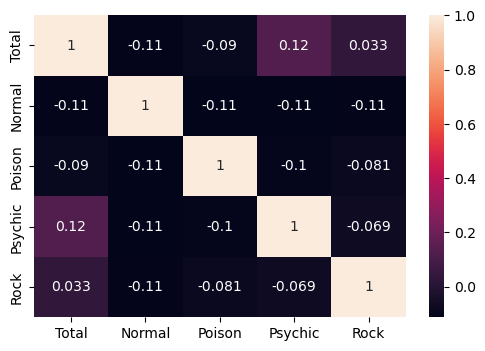

In [32]:
fig, ax = plt.subplots(dpi = 100)
sns.heatmap(set4_mc, annot = True)
plt.show()

*Set 5 - Matrix correlation and heatmap*

In [33]:
set5_mc = set_5.corr()
display(set5_mc)

,Total,Steel,Water
Total,1.000000,0.109703,-0.021665
Steel,0.109703,1.000000,-0.096131
Water,-0.021665,-0.096131,1.000000


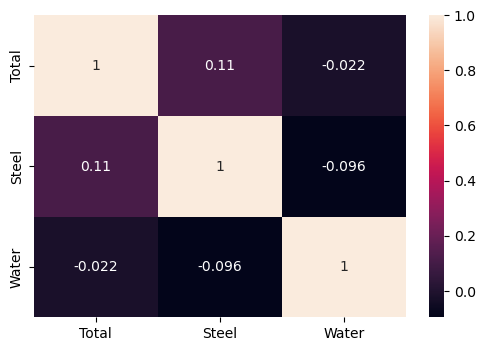

In [34]:
fig, ax = plt.subplots(dpi = 100)
sns.heatmap(set5_mc, annot = True)
plt.show()

*Now we're going to:*

1. Store our dataframe matrix correlation on a new variable
2. Drop the last column of the dataframe (as it contains redundant information)
3. Apply Rank function to our dataframe

In [35]:
# Step 1
matrix_corr_df = types_total.corr()

# Step 2
matrix_corr_df = matrix_corr_df.drop('Total', axis = 0)

# Step 3
matrix_corr_df['Rank'] = matrix_corr_df['Total'].rank(method = 'max')
display(matrix_corr_df.sort_values('Rank', ascending = False))

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Total,Rank
Dragon,-0.081200,-0.003963,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,-0.019410,-0.078818,0.052430,0.015173,-0.098702,-0.055525,-0.026557,-0.032360,-0.044417,-0.083285,0.229705,18.0
Psychic,-0.111968,-0.044327,-0.026557,-0.091928,0.027227,0.000596,-0.061243,-0.063872,-0.070947,-0.094009,-0.079079,-0.042311,-0.112381,-0.103195,1.000000,-0.069031,0.024540,-0.099639,0.124688,17.0
Steel,0.047178,-0.023978,-0.044417,-0.001346,0.013155,-0.005161,-0.056108,-0.081400,0.026479,-0.061537,-0.020771,-0.057042,-0.097645,-0.074036,0.024540,0.049202,1.000000,-0.096131,0.109703,16.0
Fire,-0.060536,-0.020368,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,-0.013459,-0.108248,-0.022621,-0.065851,-0.085097,-0.085471,-0.061243,-0.064677,-0.056108,-0.114850,0.078726,15.0
Fighting,-0.048645,-0.007791,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,-0.065792,-0.051171,-0.080531,-0.059483,-0.071687,-0.039613,0.000596,-0.055090,-0.005161,-0.073778,0.077786,14.0
Ice,-0.070229,-0.010163,0.015173,-0.033382,-0.051232,-0.059483,-0.065851,-0.049498,-0.029914,-0.027476,-0.003872,1.000000,-0.085366,-0.064726,-0.042311,-0.017110,-0.057042,0.000242,0.060248,13.0
Flying,0.064571,-0.022164,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,-0.061555,-0.081366,-0.060578,-0.049498,0.125506,-0.067950,-0.063872,-0.048221,-0.081400,-0.092030,0.059383,12.0
Dark,-0.082062,1.000000,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,0.001484,-0.048339,-0.023480,-0.010163,-0.099751,-0.018227,-0.044327,-0.033493,-0.023978,-0.028548,0.056154,11.0
Rock,-0.003706,-0.033493,-0.032360,-0.072188,0.002212,-0.055090,-0.064677,-0.048221,-0.069057,-0.072829,0.072085,-0.017110,-0.106877,-0.081036,-0.069031,1.000000,0.049202,0.011447,0.032731,10.0
Electric,-0.045111,-0.067375,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,-0.041592,-0.078818,-0.059420,-0.033382,-0.067737,-0.074838,-0.091928,-0.072188,-0.001346,-0.069109,0.020971,9.0


*From our previous analysis, we observe that the category with a higher correlation to 'Total' is Dragon (although it's showing a weak correlation).*

*We can check whether this assumption makes sense by looking at the Total values of pokemon of the type "Dragon". If we filter our data frame, we see that most of the 'Total' maximum values correspond to 'Dragon'.*

In [36]:
pokemon.sort_values('Total', ascending = False).head(30)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Hypothesis
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,780
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,770
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,770
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,720
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True,700
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,700
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,700
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,700


*We can also group our data by 'Type' and compute the mean for each one. If we do this, we confirm that pokemons of the type 'Dragon' have higher punctuation (Total).*

In [50]:
type1_grouped = pokemon.groupby('Type 1').agg({'Total':np.mean}).reset_index()
type1_grouped.sort_values('Total', ascending = False)

,Type 1,Total
2,Dragon,550.531250
16,Steel,487.703704
7,Flying,485.000000
14,Psychic,475.947368
6,Fire,458.076923
15,Rock,453.750000
1,Dark,445.741935
3,Electric,443.409091
8,Ghost,439.562500
10,Ground,437.500000


In [51]:
type2_grouped = pokemon.groupby('Type 1').agg({'Total':np.mean}).reset_index()
type2_grouped.sort_values('Total', ascending = False)

,Type 1,Total
2,Dragon,550.531250
16,Steel,487.703704
7,Flying,485.000000
14,Psychic,475.947368
6,Fire,458.076923
15,Rock,453.750000
1,Dark,445.741935
3,Electric,443.409091
8,Ghost,439.562500
10,Ground,437.500000


# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [23]:
# your code here